Importing required packages

In [23]:
import pandas as pd
import os, glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

We have 4000 text files (each corresponding to a recorded data on an optical channel for 14 months). A group of files (channels) belong to some specific optical link or segment.

The goal is to group/merge all the files belonging to some specific segment while preserving the information of channel (i.e., channel number). The information about channel and segment numbers is available in the file names so we have to extract this information also.

Following function extracts and returns segment number from the file name.

In [2]:
def get_segment_no(file_name):
    
    base_name = os.path.basename(file_name)     #extracts file name from the path
    file_without_ext = os.path.splitext(base_name)[0]  #file name without extension
    segment_no = file_without_ext.split("segment_")[-1]   #getting segment number
    
    return segment_no

Following function extracts and returns channel number from the file name.

In [3]:
def get_channel_no(file_name):
    base_name = os.path.basename(file_name)
    file_without_ext = os.path.splitext(base_name)[0]
    channel_no_temp = file_without_ext.split("channel_")[-1]
    channel_no = channel_no_temp.split("_segment_1")[0]
    
    return channel_no

Specifying the folder directory and the extension of files that need to be opended.



In [4]:
folder = r"/folder's_directory"
file_list = glob.glob(os.path.join(folder, '*.txt'))

In [5]:
# creating an empty dictionary to store the grouped files
groups = {}

With following for loop, we open each file (.txt) in the directory, add new column to store its channel number and then saving the upated file as .csv with the same name in the same directory.

In [6]:
for file_path in file_list:
    df = pd.read_table(file_path, sep='\t',  header = None)
    df["channel"] = get_channel_no(file_path)
    df.to_csv(file_path, index = False)  #save it to csv file again (text file with comma seperator)

In [7]:
# iterate over the list of files
for file_path in file_list:
    
    file_name = os.path.basename(file_path)
    group_name = get_segment_no(file_name) # get segment number
    
    # if the group_name doesn't exist in the dictionary, create it and add the file to it
    
    if group_name not in groups:
        groups[group_name] = [file_path]
    else:
        groups[group_name].append(file_path)

In [8]:
for group_name, files in groups.items():
    # create a new file to store the merged contents
    with open(os.path.join(folder, str(group_name) + '_optical_link.txt'), 'w') as outfile:
        for file_path in files:
            # open each file in the group and read its contents
            with open(file_path, 'r') as infile:
                outfile.write(infile.read())

Data for each link has been merged and stored now! Opening one of those files and doing some further manipulation!

In [41]:
file_path_new = os.path.join(folder, "1_optical_link.txt")    # we can change the file name here
df_optical_link = pd.read_csv(file_path_new)   #csv because data is sepearated using comma in text files

In [42]:
df_optical_link.head(5)

,0,1,2,3,4,channel
0,2015.03.18.19.45.00,12.03,-9.84,-2179.80,-19.56,10
1,2015.03.18.20.00.00,14.68,-9.84,-46.19,8.89,10
2,2015.03.18.20.15.00,14.75,-9.84,-43.79,8.95,10
3,2015.03.18.20.30.00,14.69,-9.83,-43.97,8.85,10
4,2015.03.18.20.45.00,14.65,-9.83,-45.48,8.68,10


In [43]:
updated_column_names = ["Date_time","Q_factor", "Transmitted_power", "CD", "PMD", "Channel"]

df_optical_link.columns = updated_column_names
df_optical_link.head(5)

,Date_time,Q_factor,Transmitted_power,CD,PMD,Channel
0,2015.03.18.19.45.00,12.03,-9.84,-2179.80,-19.56,10
1,2015.03.18.20.00.00,14.68,-9.84,-46.19,8.89,10
2,2015.03.18.20.15.00,14.75,-9.84,-43.79,8.95,10
3,2015.03.18.20.30.00,14.69,-9.83,-43.97,8.85,10
4,2015.03.18.20.45.00,14.65,-9.83,-45.48,8.68,10


In [44]:
df_optical_link.shape

(1374079, 6)

In [45]:
df_optical_link['Channel'].unique()

array(['10', 'channel', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '1', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '2', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '3', '40', '4', '5', '6', '7', '8', '9'], dtype=object)

In [46]:
df_optical_link[df_optical_link.Channel == "channel"].shape

(39, 6)

Dropping all rows where 'Channel' column has non-numeric values (i.e., channel).

In [47]:
df_optical_link = df_optical_link[df_optical_link.Channel != "channel"]
df_optical_link.shape

(1374040, 6)

In [48]:
df_optical_link['Channel'].unique()

array(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '1',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '2',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '3',
       '40', '4', '5', '6', '7', '8', '9'], dtype=object)

In [49]:
df_optical_link["Channel"] = pd.to_numeric(df_optical_link["Channel"])
df_optical_link["Channel"].value_counts().sort_index()

1     32253
2     32253
3     32253
4     32253
5     32253
6     32253
7     32253
8     32253
9     32253
10    32253
11    32237
12    32237
13    32237
14    32237
15    32237
16    32237
17    32237
18    32237
19    32237
20    32237
21    36406
22    36406
23    36406
24    36406
25    36406
26    36406
27    36406
28    36406
29    36406
30    36406
31    36508
32    36508
33    36508
34    36508
35    36508
36    36508
37    36508
38    36508
39    36508
40    36508
Name: Channel, dtype: int64

In [50]:
df_optical_link.head(5)

,Date_time,Q_factor,Transmitted_power,CD,PMD,Channel
0,2015.03.18.19.45.00,12.03,-9.84,-2179.80,-19.56,10
1,2015.03.18.20.00.00,14.68,-9.84,-46.19,8.89,10
2,2015.03.18.20.15.00,14.75,-9.84,-43.79,8.95,10
3,2015.03.18.20.30.00,14.69,-9.83,-43.97,8.85,10
4,2015.03.18.20.45.00,14.65,-9.83,-45.48,8.68,10


Now, we can probably sepeate date and time in two different columns!


In [51]:
df_optical_link['Date_time'] = pd.to_datetime(df_optical_link['Date_time'],  format = '%Y.%m.%d.%H.%M.%S')

# Extract date and time as separate columns
df_optical_link['date'] = df_optical_link['Date_time'].dt.date
df_optical_link['time'] = df_optical_link['Date_time'].dt.time

df_optical_link.drop("Date_time", axis = "columns", inplace = True)
df_optical_link.head(5)

,Q_factor,Transmitted_power,CD,PMD,Channel,date,time
0,12.03,-9.84,-2179.80,-19.56,10,2015-03-18,19:45:00
1,14.68,-9.84,-46.19,8.89,10,2015-03-18,20:00:00
2,14.75,-9.84,-43.79,8.95,10,2015-03-18,20:15:00
3,14.69,-9.83,-43.97,8.85,10,2015-03-18,20:30:00
4,14.65,-9.83,-45.48,8.68,10,2015-03-18,20:45:00


Plotting Q-factor w.r.t. date for some specific channel:

Here let's say Channel = 25


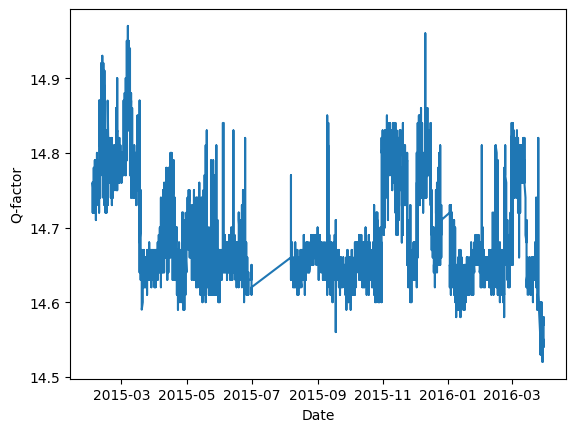

In [53]:
channel_number = 25

df_temp =  df_optical_link[df_optical_link.Channel == channel_number]
df_temp.set_index('date', inplace=True)

# Plot the data
plt.plot(df_temp.index, df_temp['Q_factor'])
# plt.ylim([14.4, 15.0])
plt.xlabel('Date')
plt.ylabel('Q-factor')
plt.show()

Further manipulation like outliers removal, or averaging data for some specific window can also be performed if desired which is not too difficult.